In [1]:
!pip install git+https://github.com/tensorflow/docs

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-sqm2lwml
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0705f63013e7f26ba6052e90ea3836153a47406c6_-py3-none-any.whl size=140285 sha256=1b65beee04635b6fc3007d3beec8372ac2b837b3d2f1a2d3aa8ca09f80694f20
  Stored in directory: /tmp/pip-ephem-wheel-cache-89s3amq3/wheels/27/ca/30/9fb73780f8e8eb5a8321ae35616b0e9609f33e6c6f4071e8dd
Successfully built tensorflow-docs
  Attempting uninstall: tensorflow-docs
    Found existing installation: tensorflow-docs 0.0.013c64f9cca4160879e4f4af7685637591136643d-
    Uninstalling tensorflow-docs-0.0.013c64f9cca4160879e4f4af7685637591136643d-:
      Successfully uninstalled tensorflow-docs-0.0.013c64f9cca4160879e4f4af7685637591136643d-


In [2]:
#%tensorflow_version 1.x
import tensorflow 
import numpy as np
 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Reshape,Activation,Attention,MaxPool1D,Dense, Conv1D, Convolution2D, GRU, LSTM, Lambda, Bidirectional, TimeDistributed,
                          Dropout, Flatten, LayerNormalization,RepeatVector, Reshape, MaxPooling1D, UpSampling1D, BatchNormalization)
import tensorflow.keras.layers as layers
import string
from tensorflow.keras.regularizers import l1, l2
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import tensorflow.keras as keras
import datetime

import tensorflow as tf
import tensorflow_probability as tfp

import numpy as np
import sys
#sys.path.append('/content/pyNSID/')
#import pyNSID as nsid
import matplotlib.pyplot as plt
#import sidpy as sid
#import h5py
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from os.path import join as pjoin

In [3]:
from tensorflow.keras.callbacks import History 

In [6]:
import tensorflow

In [4]:
tensorflow.__version__

'1.15.0'

In [5]:
from skimage import io

# Loads the image
image = io.imread('91531883_2604588709788266_6193226984089190400_n.jpg')
image = image[200:1900:20, 100:1500:20]/255

In [6]:
image.shape

(85, 70, 3)

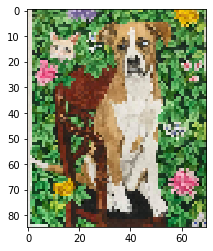

In [7]:
from skimage.color import rgb2gray
plt.imshow(image)
#gray_image = rgb2gray(image)
#plt.imshow(gray_image)

In [8]:
def sin(t, A, f, phi):
  return np.cos(2*np.pi*t*2+2*np.pi*A) + 2*np.cos(2*np.pi*t*2+2*np.pi*(f+.2)) + 3*np.cos(2*np.pi*t*4+2*np.pi*(phi+.75)) #1/(1 + np.exp(-x)) 

In [9]:
t = np.linspace(-1, 1, 50)

data = np.zeros((image.reshape(-1,3).shape[0],50))

for i in range(image.reshape(-1,3).shape[0]):
    data[i,:] = sin(t, image.reshape(-1,3)[:,0][i], image.reshape(-1,3)[:,1][i],image.reshape(-1,3)[:,2][i])

5579


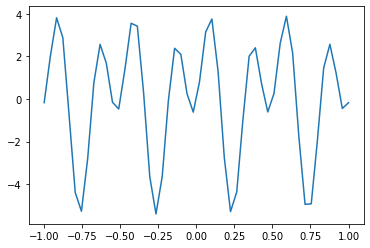

In [10]:
# plots an example of the data
i = np.random.randint(0,len(image.reshape(-1,3)))
print(i)

plt.plot(t, data[i])

In [11]:
class global_scaler:
        
    def fit(self, data):
        self.mean = np.mean(data.reshape(-1))
        self.std = np.std(data.reshape(-1))
        
    def fit_transform(self, data):
        self.fit(data)
        return self.transform(data)
    
    def transform(self, data):
        return (data - self.mean)/self.std
    
    def inverse_transform(self, data):
        return (data * self.std) + self.mean

In [12]:
scaler = global_scaler()

scaled_data = scaler.fit_transform(data)


In [13]:
print(scaler.mean)
print(scaler.std)

0.02156212484797769
2.6350598818049034


4165


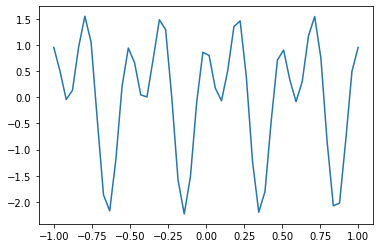

In [14]:
# plots an example of the data
i = np.random.randint(0,len(image.reshape(-1,3)))
print(i)

plt.plot(t, scaled_data[i])

In [15]:
scaler = global_scaler()

scaled_data = scaler.fit_transform(data)

In [25]:
nclusters = 5

kmeans = KMeans(n_clusters=nclusters, random_state=0).fit(scaled_data)

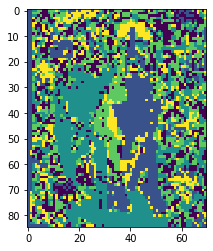

In [26]:
plt.imshow(kmeans.labels_.reshape(image.shape[0:2]))

In [ ]:
clusters_2nd = kmeans.labels_
centroids_2nd = kmeans.cluster_centers_

#### Reformat the kmeans results to use as the initial guess for Dictionary learning
labels = clusters_2nd
comp_init = np.zeros_like(centroids_2nd)
lm_init = np.zeros((len(labels),nclusters))
for i in range(nclusters):
    u = np.zeros_like(labels)
    u[labels==i] = 1
    lm_init[:,i] = u
    comp_init[i] = centroids_2nd[i]

In [ ]:
from sklearn.decomposition import DictionaryLearning

model = DictionaryLearning(n_components=5,code_init=lm_init, dict_init = comp_init, n_jobs=-1, max_iter=1000, transform_algorithm='lasso_lars', alpha=1, fit_algorithm='cd',positive_code=True, tol=1e-9)

model.fit(scaled_data)

DictionaryLearning(alpha=1,
                   code_init=array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]]),
                   dict_init=array([[ 0.24057235,  0.33993782, -0.42520758, -1.37596915, -1.5034909 ,
        -0.46465292,  1.03073624,  1.82879266,  1.36926155,  0.17151703,
        -0.68545853, -0.5831406 ,  0.09402075,  0.40248779, -0.17656919,
        -1.1804676...
        -0.67780707, -0.17128111,  0.86448285,  1.43764362,  0.90469698,
        -0.38616149, -1.38792109, -1.31271561, -0.34514346,  0.56440594]]),
                   fit_algorithm='cd', max_iter=1000, n_components=5, n_jobs=-1,
                   positive_code=True, positive_dict=False, random_state=None,
                   split_sign=False, tol=1e-09,
                   transform_algorithm='lasso_lars', transform_alpha=None,
                   transform_max_iter=1000, transform

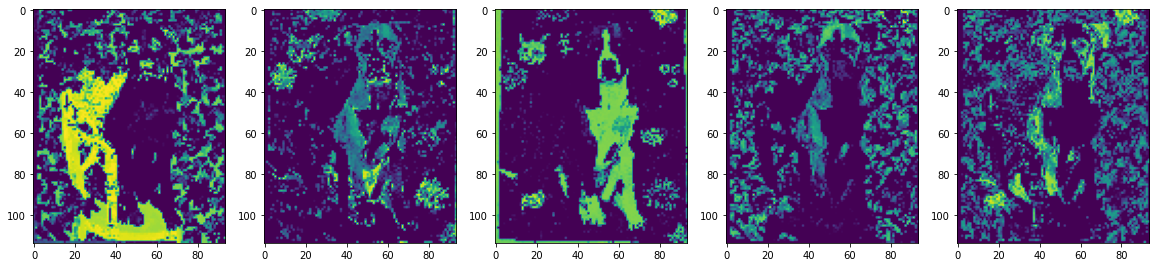

In [ ]:
out = model.transform(scaled_data)

fig, ax = plt.subplots(1,5, figsize=(20,5))  

for i, ax in enumerate(ax):
  ax.imshow(out[:,i].reshape(image.shape[0], image.shape[1]))

In [ ]:
return_data = np.dot(out,model.components_)

In [ ]:
mean_squared_error(scaled_data, return_data)    

0.08482875291745778

9098


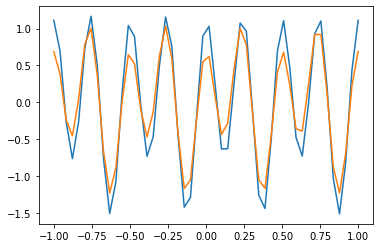

In [ ]:
i = np.random.randint(0,len(image[:,:,1].reshape(-1)))
print(i)

plt.plot(t, scaled_data[i])
plt.plot(t, return_data[i])

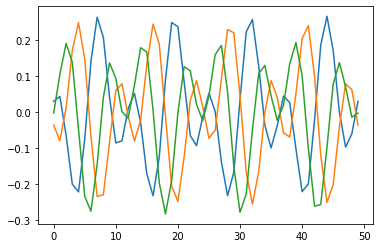

In [ ]:
plt.plot(model.components_[0])
plt.plot(model.components_[1])
plt.plot(model.components_[2])

In [32]:
mse = np.mean((scaled_data - return_data)**2,axis=1)

NameError: name 'return_data' is not defined

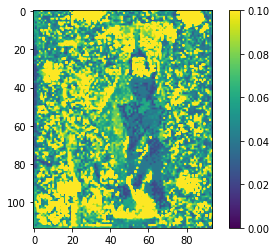

In [ ]:
plt.imshow(mse.reshape(image.shape[0:2]))
plt.clim(0,.1)
plt.colorbar()

In [ ]:
def make_folder(folder, **kwargs):
    """
    Function that makes new folders
    Parameters
    ----------'
    folder : string
        folder where to save
    Returns
    -------
    folder : string
        folder where to save
    """

    # Makes folder
    os.makedirs(folder, exist_ok=True)

    return (folder)

# modified model

In [16]:
class Sampling(layers.Layer):
  """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

  def call(self, inputs):
    z_mean, z_log_var = inputs
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

class model_builder:
    
    def __init__(self,
                 input_data, 
                drop_frac = 0.2, 
                 layer_size = 128, 
                 num_ident_blocks = 3, 
                 l1_norm = 0,
                 l1_norm_embedding = 1e-5, 
                 layer_steps = 2,
                 embedding = 16, 
                 VAE = True):
#                 coef = 1):
    # Sets self.mean and self.std to use in the loss function;
#       self.mean = 0
#       self.std = 0
    
      # Sets the L1 norm on the decoder/encoder layers
      self.l1_norm = l1_norm
 
      # Sets the fraction of dropout
      self.drop_frac = drop_frac
      
      # saves the shape of the input data
      self.data_shape = input_data.shape
 
      # Sets the number of neurons in the encoder/decoder layers
      self.layer_size = layer_size
 
      # Sets the number of neurons in the embedding layer
      self.embedding = embedding 
 
      # Bool to set if the model is a VAE 
      self.VAE = VAE
 
      # Set the magnitude of the l1 regularization on the embedding layer.
      self.l1_norm_embedding = l1_norm_embedding
 
      # sets the number of layers between the residual layer
      self.layer_steps = layer_steps

#      self.coef = coef
 
      # set the number of identity block
      self.num_ident_blocks = num_ident_blocks
 
      self.model_constructor(input_data)
 
    def identity_block(self, X, name, 
                      block):
      
      # sets the name of the conv layers
      LSTM_name_base =  name + '_LSTM_Res_' + block
      bn_name_base = name + '_layer_norm_' + block
 
 
      # output for the residual layer
      X_shortcut = X
 
      for i in range(self.layer_steps):
        # bidirectional LSTM
        X = layers.Bidirectional(LSTM(self.layer_size, 
                                      return_sequences=True, 
                                      dropout=self.drop_frac,
                                      activity_regularizer=l1(self.l1_norm)), 
                                input_shape=(self.data_shape[1], self.data_shape[2]))(X)
 
        # TODO, We could add layer norm
        X = layers.Activation('relu')(X)  
 
      X = layers.add([X, X_shortcut])
      X = layers.LayerNormalization(axis = 1, name = bn_name_base + '_res_end')(X)
      X = layers.Activation('relu')(X)
 
      return X
 
    def model_constructor(self, input_data):
      # defines the input
      encoder_input = layers.Input(shape=(self.data_shape[1:]))

      X = encoder_input
      
      for i in range(self.num_ident_blocks):
        X = self.identity_block(X, 'encoder', string.ascii_uppercase[i+1])
        
      # This is in preparation for the embedding layer
      X = layers.Bidirectional(LSTM(self.layer_size, 
                                    return_sequences=False, 
                                    dropout=self.drop_frac,
                                    activity_regularizer=l1(self.l1_norm)), 
                                    input_shape=(self.data_shape[1], 
                                                 self.data_shape[2]))(X)   
      
      X = layers.BatchNormalization(axis=1, name='last_encode')(X)
      X = layers.Activation('relu')(X)

      if self.VAE:
            
            z_mean = layers.Dense(self.embedding, name="z_mean")(X)
            z_log_var = layers.Dense(self.embedding, name="z_log_var")(X)
            z = Sampling()((z_mean, z_log_var))
            z = layers.Activation('relu')(z)
            #z = layers.ActivityRegularization(l1=self.l1_norm_embedding)(z)
            # update the self.mean and self.std:
            self.mean = z_mean
            self.std = z_log_var

      self.encoder_model = Model(inputs=encoder_input, outputs=z, name='LSTM_encoder')

      decoder_input = layers.Input(shape=(self.embedding,), name="z_sampling")

      X = layers.RepeatVector(self.data_shape[1])(decoder_input)
 
      X = layers.Bidirectional(LSTM(self.layer_size, return_sequences=True, 
                                    dropout=self.drop_frac,
                                    activity_regularizer=l1(self.l1_norm)))(X)
 
      # X = layers.BatchNormalization(axis = 1, name = 'fires_decode')(X)
      X = layers.Activation('relu')(X)
 
      for i in range(self.num_ident_blocks):
        X = self.identity_block(X, 'decoder', string.ascii_uppercase[i+1])
    
 
      X = layers.LayerNormalization(axis=1, name='batch_normal')(X)
      X = layers.TimeDistributed(Dense(1, activation='linear'))(X)

      self.decoder_model = Model(inputs=decoder_input, outputs=X, name='LSTM_encoder')

      outputs = self.decoder_model(z)

      self.vae = tf.keras.Model(inputs=encoder_input, outputs=outputs, name="vae")

      # Add KL divergence regularization loss.
#       kl_loss = -0.5 * tf.reduce_mean(z_log_var - tf.square(z_mean) - tf.exp(z_log_var) + 1)
#       self.vae.add_loss(self.coef*kl_loss)

In [ ]:
model = model_builder(np.atleast_3d(scaled_data),embedding=16, 
                      VAE=True, l1_norm_embedding=1e-3)

In [26]:
model.vae.summary()

Model: "vae"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50, 1)]      0                                            
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 50, 256)      133120      input_1[0][0]                    
__________________________________________________________________________________________________
activation (Activation)         (None, 50, 256)      0           bidirectional[0][0]              
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 50, 256)      394240      activation[0][0]                 
________________________________________________________________________________________________

In [17]:
def KL_Loss(z_mean, z_log_var,coef):
    
    l1 = tensorflow.square(1.0*z_mean)
#    l1 = tf.dtypes.cast(l1,tf.float32)
    l2 = tensorflow.exp(z_log_var*1.0)
#    l2 = tf.dtypes.cast(l2,tf.float32)
    kl_loss = -0.5 * tensorflow.reduce_mean(z_log_var - l1 - l2 + 1)
#    kl_loss = tf.dtypes.cast(kl_loss,tf.float32)
    
    def loss(y_true, y_pred):
        
        img_loss = tensorflow.reduce_mean(tensorflow.math.squared_difference(y_pred, y_true))
        
        return img_loss + coef*kl_loss
    
    return loss

In [24]:
run_id = 'scaled_Triple_Phase_VAE_embedding_' + np.str(model.embedding) + '_layer_size_' + np.str(model.layer_size) + '_l1_norm_' + np.str(model.l1_norm) + '_l1_norm_' + np.str(model.l1_norm_embedding) + '_VAE_' + np.str(model.VAE)

import os
folder = make_folder('Faster_Better_Paper/' + run_id)
def Train(folder, epochs, epoch_per_increase, initial_beta, beta_per_increase):
    best_loss = float('inf')
#    iteration = epochs//epoch_per_increase + 1
    
    for i in range(epochs):
        
        iteration = i//epoch_per_increase
        beta = initial_beta + beta_per_increase*iteration
        print(beta)
        
#        beta = beta + i*beta_per_increase
        # sets the file path
#        filepath = folder + '/triple_phase_weights2_epochs='+np.str(i)+'-{loss:.4f}.hdf5'

        # callback for saving checkpoints. Checkpoints are only saved when the model improves
#         checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='loss',
#                                                       verbose=0, save_best_only=True,
#                                                       save_weights_only=True, mode='min')
        optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
        if i==0:
            
            model.vae.compile(optimizer, loss=KL_Loss(0,0,beta))
        else:
            model.vae.compile(optimizer, loss=KL_Loss(model.mean,model.std,beta))
        hist = model.vae.fit(np.atleast_3d(scaled_data),
                np.atleast_3d(scaled_data),
                batch_size=320, epochs=1)
        total_loss = hist.history['loss'][0]
        if total_loss < best_loss:
            best_loss = total_loss
            filepath = folder + '/triple_phase_weights2_epochs='+np.str(i)+'-loss-'+np.str(total_loss)+'-.hdf5'
            model.vae.save(filepath)
        
        
        
        

In [27]:
# total epochs = 10, per_epoch updating beta = 1, initial_beta = 0.01, per_updating_beta=0.01

In [25]:
Train(folder,10,1,0.01,0.01)

0.01
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 5950 samples
5950/5950 [==============================] - 167s 28ms/sample - loss: 2.7246
0.02
Train on 5950 samples
5950/5950 [==============================] - 174s 29ms/sample - loss: 2.5677
0.03
Train on 5950 samples
5950/5950 [==============================] - 170s 29ms/sample - loss: 2.4321
0.04


KeyboardInterrupt: 

# .................................. run the code above, under the tf = 1.15.0

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [52]:
run_id = 'scaled_Triple_Phase_VAE_embedding_' + np.str(model.embedding) + '_layer_size_' + np.str(model.layer_size) + '_l1_norm_' + np.str(model.l1_norm) + '_l1_norm_' + np.str(model.l1_norm_embedding) + '_VAE_' + np.str(model.VAE) + '_coeff_' + np.str(model.coef)

import os
folder = make_folder('Faster_Better_Paper/' + run_id)

# sets the file path
filepath = folder + '/triple_phase_weights2.{epoch:06d}-{loss:.4f}.hdf5'

# callback for saving checkpoints. Checkpoints are only saved when the model improves
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='loss',
                                              verbose=0, save_best_only=True,
                                              save_weights_only=True, mode='min')

optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
model.vae.compile(optimizer, loss=tf.keras.losses.MeanSquaredError())
hist = model.vae.fit(np.atleast_3d(scaled_data),
        np.atleast_3d(scaled_data),
        batch_size=320, epochs=1)

Train on 5950 samples
5950/5950 [==============================] - 141s 24ms/sample - loss: 1.8047


In [54]:
hist.history

{'loss': [1.8046913299239984]}

In [ ]:
run_id = 'scaled_Triple_Phase_VAE_embedding_' + np.str(model.embedding) + '_layer_size_' + np.str(model.layer_size) + '_l1_norm_' + np.str(model.l1_norm) + '_l1_norm_' + np.str(model.l1_norm_embedding) + '_VAE_' + np.str(model.VAE) + '_coeff_' + np.str(model.coef)

import os
folder = make_folder('/content/drive/My Drive/papers/Faster_Better_Paper/' + run_id)

# sets the file path
filepath = folder + '/triple_phase_weights2.{epoch:06d}-{loss:.4f}.hdf5'

# callback for saving checkpoints. Checkpoints are only saved when the model improves
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='loss',
                                              verbose=0, save_best_only=True,
                                              save_weights_only=True, mode='min')

optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
model.vae.compile(optimizer, loss=tf.keras.losses.MeanSquaredError())
model.vae.fit(np.atleast_3d(scaled_data),
        np.atleast_3d(scaled_data),
        batch_size=320, epochs=10000, callbacks=[checkpoint])

Epoch 1/10000
19/19 [==============================] - 4s 198ms/step - loss: 3.3149
Epoch 2/10000
19/19 [==============================] - 4s 203ms/step - loss: 3.0365
Epoch 3/10000
19/19 [==============================] - 4s 202ms/step - loss: 2.8368
Epoch 4/10000
19/19 [==============================] - 4s 202ms/step - loss: 2.7008
Epoch 5/10000
19/19 [==============================] - 4s 204ms/step - loss: 2.5923
Epoch 6/10000
19/19 [==============================] - 4s 199ms/step - loss: 2.5073
Epoch 7/10000
19/19 [==============================] - 4s 203ms/step - loss: 2.4144
Epoch 8/10000
19/19 [==============================] - 4s 204ms/step - loss: 2.3357
Epoch 9/10000
19/19 [==============================] - 4s 199ms/step - loss: 2.2716
Epoch 10/10000
19/19 [==============================] - 4s 206ms/step - loss: 2.2119
Epoch 11/10000
19/19 [==============================] - 4s 200ms/step - loss: 2.1457
Epoch 12/10000
19/19 [==============================] - 4s 202ms/step - lo

In [ ]:
model.vae.save_weights(folder + 'final')

In [ ]:
out = model.vae.predict(np.atleast_3d(scaled_data))

3927


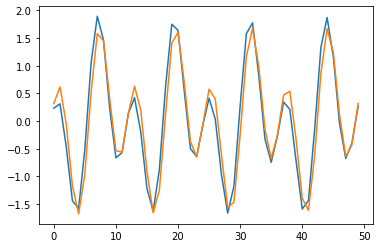

In [ ]:
i = np.random.randint(0,out.shape[0])
print(i)
plt.plot(out[i])
plt.plot(scaled_data[i])

In [ ]:
embedding = model.encoder_model.predict(np.atleast_3d(scaled_data))

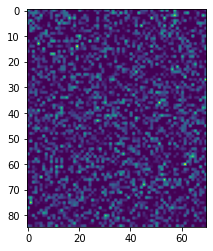

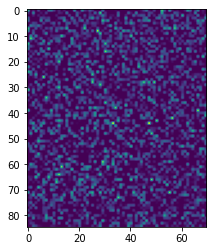

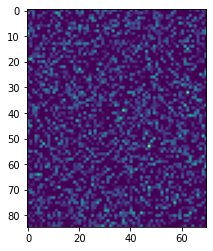

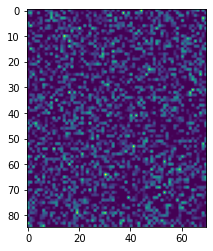

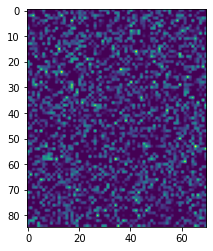

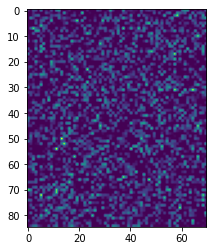

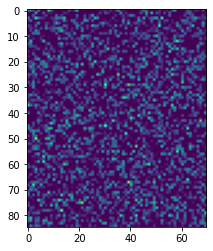

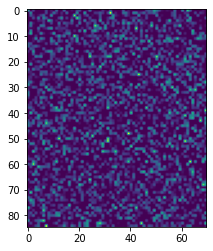

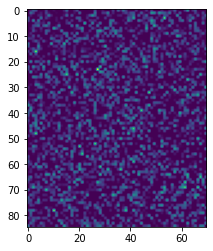

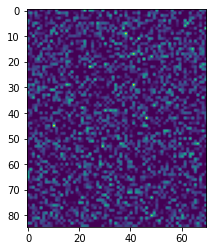

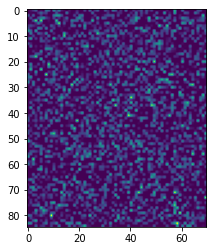

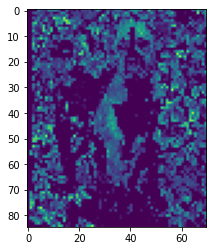

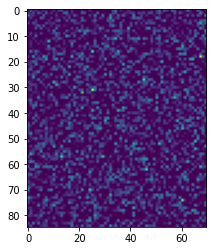

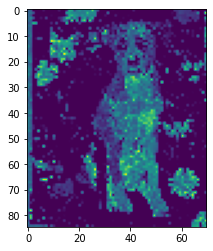

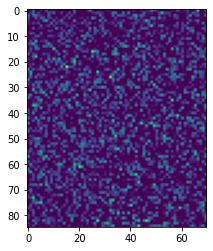

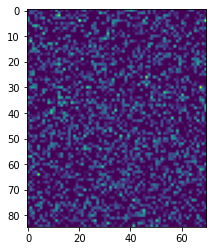

In [ ]:
for i in range(16):
  plt.figure()
  plt.imshow(embedding[:,i].reshape(image.shape[0:2]))

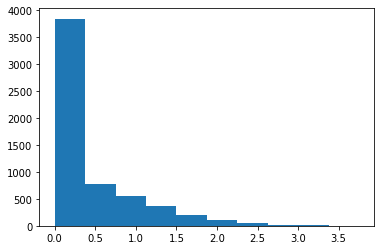

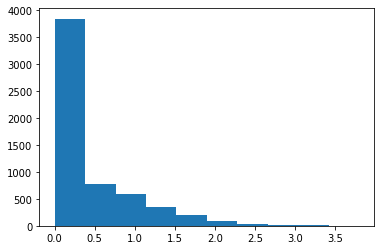

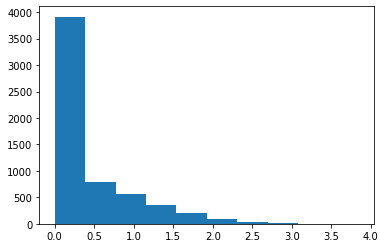

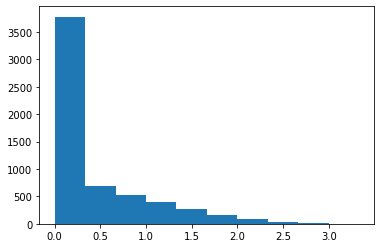

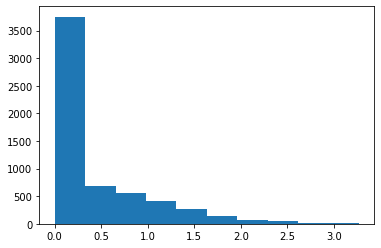

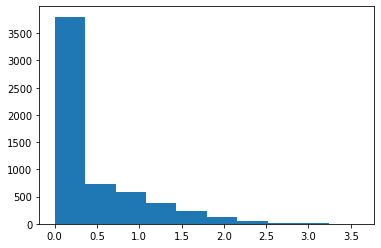

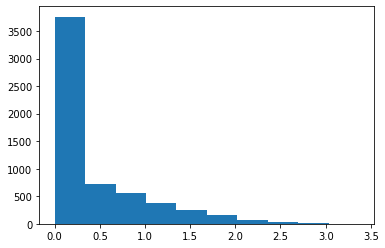

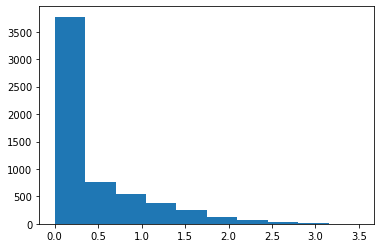

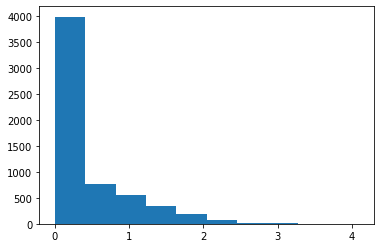

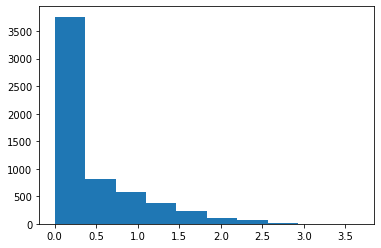

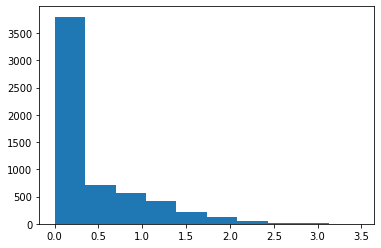

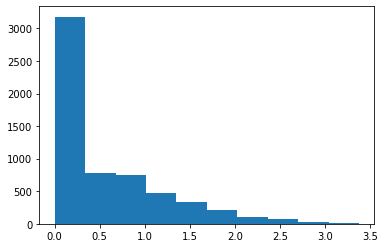

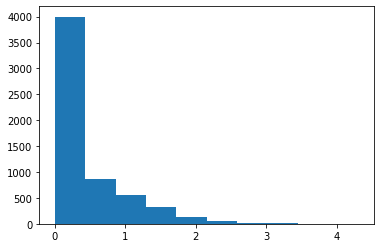

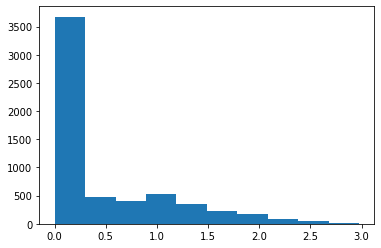

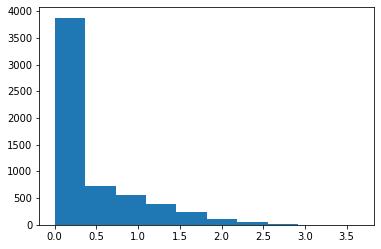

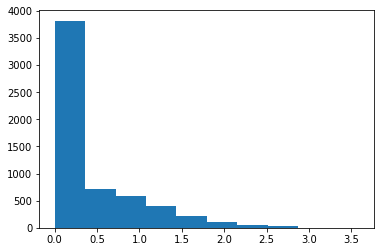

In [ ]:
for i in range(16):
  plt.figure()
  plt.hist(embedding[:,i])

In [ ]:
np.save('/content/drive/My Drive/papers/Faster_Better_Paper/' + run_id + '/Data_file',scaled_data)

In [ ]:
# sets the file path
filepath = folder + '/triple_phase_weights2.{epoch:06d}-{loss:.4f}.hdf5'

# callback for saving checkpoints. Checkpoints are only saved when the model improves
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='loss',
                                              verbose=0, save_best_only=True,
                                              save_weights_only=True, mode='min')

In [ ]:
model.model.load_weights('/content/drive/My Drive/papers/Faster_Better_Paper/scaled_Layer_Norm_Triple_Phase_no_VAE_embedding_16_layer_size_128_l1_norm_0_l1_norm_0.001_VAE_False_coeff_0/triple_phase_weights.000997-0.0136.hdf5')

In [ ]:
model.model.fit(np.atleast_3d(scaled_data),
                np.atleast_3d(scaled_data),
                batch_size=320, epochs=1000, callbacks=[checkpoint])

In [ ]:
out = model.model.predict(np.atleast_3d(scaled_data), batch_size=320)

3086


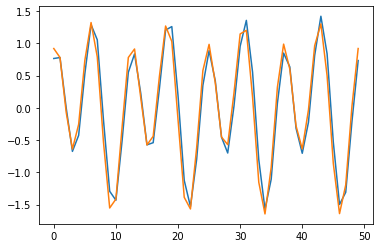

In [ ]:
i = np.random.randint(0,out.shape[0])
print(i)
plt.plot(out[i])
plt.plot(scaled_data[i])

In [ ]:
def get_activations(model, X=[], i=[], mode='test'):
    """
    function to get the activations of a specific layer
    this function can take either a model and compute the activations or can load previously
    generated activations saved as an numpy array
    Parameters
    ----------
    model : keras model, object
        pre-trained keras model
    X  : numpy array, float
        Input data
    i  : numpy, int
        index of the layer to extract
    mode : string, optional
        test or train, changes the model behavior to scale the network properly when using
        dropout or batchnorm
    Returns
    -------
    activation : float
        array containing the output from layer i of the network
    """
    # if a string is passed loads the activations from a file
    if isinstance(model, str):
        activation = np.load(model)
        print(f'activations {model} loaded from saved file')
    else:
        # computes the output of the ith layer
        activation = get_ith_layer_output(model, np.atleast_3d(X), i, model)

    return activation


def get_ith_layer_output(model, X, i, mode='test'):
    """
    Computes the activations of a specific layer
    see https://keras.io/getting-started/faq/#keras-faq-frequently-asked-keras-questions'
    Parameters
    ----------
    model : keras model, object
        pre-trained keras model
    X  : numpy array, float
        Input data
    i  : numpy, int
        index of the layer to extract
    mode : string, optional
        test or train, changes the model behavior to scale the network properly when using
        dropout or batchnorm
    Returns
    -------
    layer_output : float
        array containing the output from layer i of the network
    """
    # computes the output of the ith layer
    get_ith_layer = keras.backend.function(
        [model.layers[0].input, keras.backend.learning_phase()], [model.layers[i].output])
    layer_output = get_ith_layer([X, 0 if mode == 'test' else 1])[0]

    return layer_output


In [ ]:
for i, j in enumerate(model.model.layers):
  print(i,j)

0 <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f3e33581940>
1 <tensorflow.python.keras.layers.wrappers.Bidirectional object at 0x7f3e33581470>
2 <tensorflow.python.keras.layers.core.Activation object at 0x7f3e336a7080>
3 <tensorflow.python.keras.layers.wrappers.Bidirectional object at 0x7f3e335ddbe0>
4 <tensorflow.python.keras.layers.core.Activation object at 0x7f3e332dcc50>
5 <tensorflow.python.keras.layers.merge.Add object at 0x7f3e335ce780>
6 <tensorflow.python.keras.layers.normalization.LayerNormalization object at 0x7f3e3360bda0>
7 <tensorflow.python.keras.layers.core.Activation object at 0x7f3e332e09e8>
8 <tensorflow.python.keras.layers.wrappers.Bidirectional object at 0x7f3e332f6cf8>
9 <tensorflow.python.keras.layers.core.Activation object at 0x7f3e330d1ba8>
10 <tensorflow.python.keras.layers.wrappers.Bidirectional object at 0x7f3e330d7b38>
11 <tensorflow.python.keras.layers.core.Activation object at 0x7f3e32f359e8>
12 <tensorflow.python.keras.layers.merge

In [ ]:
embedding = get_ith_layer_output(model.model, np.atleast_3d(scaled_data), 24)

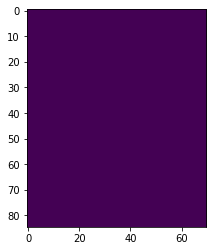

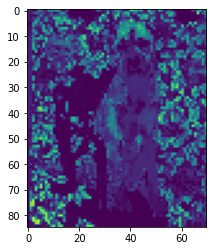

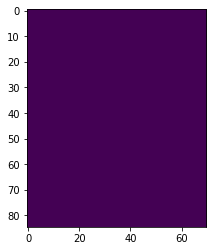

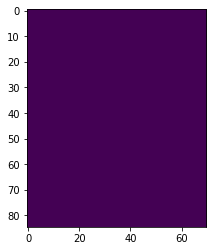

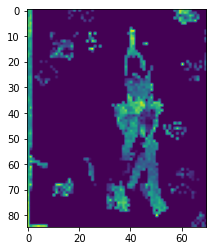

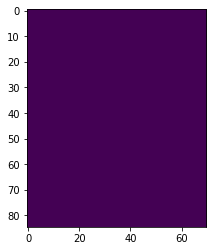

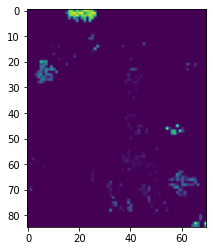

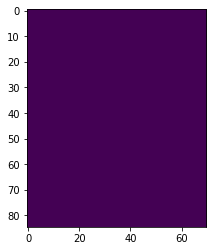

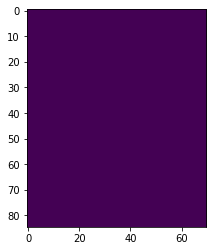

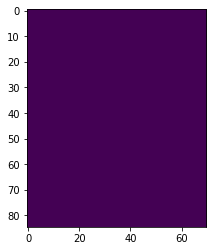

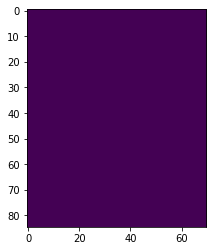

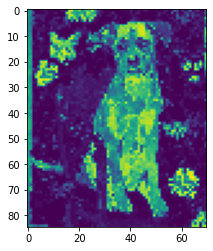

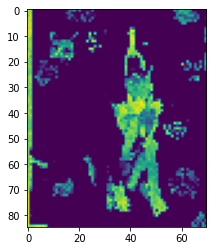

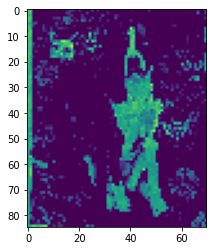

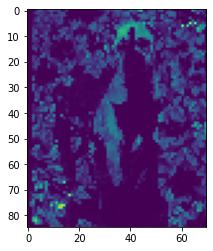

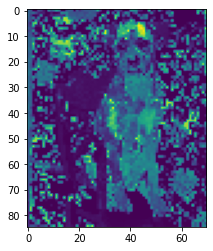

In [ ]:
for i in range(16):
  plt.figure()
  plt.imshow(embedding[:,i].reshape(image.shape[0:2]))

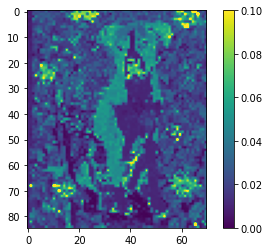

In [ ]:
mse = np.mean((scaled_data - out.squeeze())**2,axis=1)
plt.imshow(mse.reshape(image.shape[0:2]))
plt.colorbar()
plt.clim(0,.1)


In [ ]:
scaled_data.shape


(5950, 50)